In [1]:
import sys
sys.path.append('../src')

import seaborn as sns
import pandas as pd
from functools import reduce

from parse_logs.parse_base import LogDir
from parse_logs.extract_tasks_exec_result import TaskResult, parse_task_state

from evaluate.trial_result import TrialResultEvaluator
from evaluate.trial_result import init_bid_store

# PathDir.root_data_path
LogDir.base_data_path = '../data'
exec_code='experiment_2021_07_29_15_33_17_run_1'

tre = TrialResultEvaluator()
task_results = tre.task_results(exec_code=exec_code)

# trs = [tr for tr in task_results]
tr_df = pd.DataFrame.from_records(task_results)
tr_df


acccbp
acbbcp
acabap
ababap
aaabbp
abbbcp
abccbp
aaccap
acccap
acabbp
aaabap
ababbp
aabbcp
aaccbp
abccap
acbcap
acaccp
aacbcp
abaccp
aabcbp
abbcap
acbcbp
accbcp
abcbcp
aaaccp
abbcbp
aabcap
abaaap
abbacp
aaaabp
acbacp
acaaap
aaaaap
aabacp
abaabp
acaabp
aacacp
abcacp
accacp
aacaap
abcabp
accabp
abcaap
aacabp
accaap
abbaap
abaacp
aababp
acaacp
acbaap
aabaap
aaaacp
abbabp
acbabp
acacap
acbccp
accbbp
aacbap
abcbbp
abbccp
aaacbp
abacap
acacbp
accbap
abcbap
aacbbp
aabccp
abacbp
aaacap
acabcp
acbbap
abbbap
aabbbp
ababcp
aacccp
accccp
acbbbp
aabbap
abbbbp
aaabcp
abcccp
parsing ending task turtlebot6:navto_lab, but it was not started
ignoring "trial.log, wrong name format"
parsing ending task turtlebot2:open_drawer_lab, but it was not started
parsing ending task turtlebot2:navto_lab, but it was not started
parsing ending task turtlebot6:approach_arm, but it was not started
parsing ending task turtlebot3:navto_lab, but it was not started
parsing ending task turtlebot2:navto_room, but it was not s

,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state
0,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_room,"{'param_list': ['IC Room 6', [[-37.0, 33.95, -...",18.17,205.15,186.98,SUCCESS,NaN,None,low-battery
1,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",205.15,205.80,0.65,SUCCESS,NaN,None,low-battery
2,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,authenticate_person,authenticate_nurse,"{'param_list': ['nurse'], 'label': 'authentica...",205.82,206.28,0.46,SUCCESS,NaN,None,low-battery
3,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,operate_drawer,open_drawer_for_nurse,"{'param_list': ['open'], 'label': 'open_drawer...",206.28,207.18,0.90,SUCCESS,NaN,None,low-battery
4,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,send_message,notify_nurse_of_open_drawer_for_nurse_completed,"{'param_list': ['nurse'], 'label': 'notify_nur...",207.20,210.33,3.13,SUCCESS,NaN,None,low-battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,close_drawer_nurse,"{'param_list': ['close'], 'label': 'close_draw...",80.93,81.82,0.89,SUCCESS,2.0,None,success
11689,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,navigation,navto_lab,"{'param_list': ['Laboratory', [[-28.5, 16.0, 0...",81.82,178.50,96.68,SUCCESS,50.0,took more then expected,success
11690,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,approach_robot,approach_arm,"{'param_list': ['lab_arm'], 'label': 'approach...",178.50,179.13,0.63,SUCCESS,2.0,None,success
11691,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,open_drawer_lab,"{'param_list': ['open'], 'label': 'open_drawer...",179.13,180.03,0.90,SUCCESS,2.0,None,success


In [2]:
def get_treatment(row):
    return 'planned' if row['code'][-1] == 'p' else 'baseline'

tr_df['treatment'] = tr_df.apply(get_treatment,  axis=1)
tr_df

,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state,treatment
0,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_room,"{'param_list': ['IC Room 6', [[-37.0, 33.95, -...",18.17,205.15,186.98,SUCCESS,NaN,None,low-battery,baseline
1,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",205.15,205.80,0.65,SUCCESS,NaN,None,low-battery,baseline
2,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,authenticate_person,authenticate_nurse,"{'param_list': ['nurse'], 'label': 'authentica...",205.82,206.28,0.46,SUCCESS,NaN,None,low-battery,baseline
3,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,operate_drawer,open_drawer_for_nurse,"{'param_list': ['open'], 'label': 'open_drawer...",206.28,207.18,0.90,SUCCESS,NaN,None,low-battery,baseline
4,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,send_message,notify_nurse_of_open_drawer_for_nurse_completed,"{'param_list': ['nurse'], 'label': 'notify_nur...",207.20,210.33,3.13,SUCCESS,NaN,None,low-battery,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,close_drawer_nurse,"{'param_list': ['close'], 'label': 'close_draw...",80.93,81.82,0.89,SUCCESS,2.0,None,success,planned
11689,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,navigation,navto_lab,"{'param_list': ['Laboratory', [[-28.5, 16.0, 0...",81.82,178.50,96.68,SUCCESS,50.0,took more then expected,success,planned
11690,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,approach_robot,approach_arm,"{'param_list': ['lab_arm'], 'label': 'approach...",178.50,179.13,0.63,SUCCESS,2.0,None,success,planned
11691,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,open_drawer_lab,"{'param_list': ['open'], 'label': 'open_drawer...",179.13,180.03,0.90,SUCCESS,2.0,None,success,planned


In [3]:
tr_df[tr_df.code == 'aaaaab']

,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state,treatment
0,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_room,"{'param_list': ['IC Room 6', [[-37.0, 33.95, -...",18.17,205.15,186.98,SUCCESS,NaN,None,low-battery,baseline
1,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",205.15,205.80,0.65,SUCCESS,NaN,None,low-battery,baseline
2,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,authenticate_person,authenticate_nurse,"{'param_list': ['nurse'], 'label': 'authentica...",205.82,206.28,0.46,SUCCESS,NaN,None,low-battery,baseline
3,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,operate_drawer,open_drawer_for_nurse,"{'param_list': ['open'], 'label': 'open_drawer...",206.28,207.18,0.90,SUCCESS,NaN,None,low-battery,baseline
4,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,send_message,notify_nurse_of_open_drawer_for_nurse_completed,"{'param_list': ['nurse'], 'label': 'notify_nur...",207.20,210.33,3.13,SUCCESS,NaN,None,low-battery,baseline
5,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,wait_message,wait_nurse_to_complete_deposit,"{'param_list': ['nurse'], 'label': 'wait_nurse...",210.33,212.15,1.82,SUCCESS,NaN,None,low-battery,baseline
6,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,operate_drawer,close_drawer_nurse,"{'param_list': ['close'], 'label': 'close_draw...",212.15,213.07,0.92,SUCCESS,NaN,None,low-battery,baseline
7,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_lab,"{'param_list': ['Laboratory', [[-37.0, 18.93, ...",213.07,322.31,109.24,None,NaN,None,low-battery,baseline
2942,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-04,01,turtlebot4,navigation,navto_room,"{'param_list': ['IC Room 6', [[-37.0, 33.95, -...",12.32,199.25,186.93,SUCCESS,NaN,None,low-battery,baseline
2943,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-04,01,turtlebot4,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",199.27,199.63,0.36,SUCCESS,NaN,None,low-battery,baseline


In [4]:
tr_df.groupby(['code', 'treatment', 'trial_end_state', 'label', 'end_state'])['skill'].count()

code    treatment  trial_end_state  label                                            end_state
aaaaab  baseline   low-battery      approach_nurse                                   SUCCESS      6
                                    authenticate_nurse                               SUCCESS      6
                                    close_drawer_nurse                               SUCCESS      5
                                    navto_room                                       SUCCESS      6
                                    notify_nurse_of_open_drawer_for_nurse_completed  SUCCESS      5
                                                                                                 ..
accccp  planned    timeout-sim      notify_lab_arm_of_open_drawer_lab_completed      SUCCESS      1
                                    notify_nurse_of_open_drawer_for_nurse_completed  SUCCESS      2
                                    open_drawer_for_nurse                            SUCCESS      2
     

In [5]:
def fix_end_state_for_land_send_message(row):
    if row['trial_end_state'] == 'success' and row['end_state'] == 'UNKNOWN':
        return 'SUCCESS'
    else:
        return row['end_state']

tr_df['end_state_fixed'] = tr_df.apply(fix_end_state_for_land_send_message, axis=1)
tr_df[ (tr_df.end_state != 'SUCCESS')].groupby(['code', 'skill', 'treatment', 'end_state', 'trial_end_state'])['skill'].count()

Series([], Name: skill, dtype: int64)

In [6]:
tr_df[tr_df.end_state != 'SUCCESS']

,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state,treatment,end_state_fixed
7,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_lab,"{'param_list': ['Laboratory', [[-37.0, 18.93, ...",213.07,322.31,109.24,None,NaN,None,low-battery,baseline,None
18,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",449.78,662.63,212.85,None,2.0,took more then expected,success,planned,None
31,experiment_2021_07_29_15_33_17_run_1,aaaabp,les-02,02,turtlebot2,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",400.57,565.54,164.97,None,2.0,took more then expected,success,planned,None
44,experiment_2021_07_29_15_33_17_run_1,aaaacp,les-02,03,turtlebot2,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",207.35,304.31,96.96,None,2.0,took more then expected,success,planned,None
55,experiment_2021_07_29_15_33_17_run_1,aaabab,les-02,04,turtlebot5,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",441.42,654.62,213.20,None,NaN,None,success,baseline,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,experiment_2021_07_29_15_33_17_run_1,acccap,les-07,79,turtlebot3,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",342.12,511.48,169.36,None,2.0,took more then expected,success,planned,None
11659,experiment_2021_07_29_15_33_17_run_1,acccbb,les-07,80,turtlebot3,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",428.47,627.61,199.14,None,NaN,None,success,baseline,None
11670,experiment_2021_07_29_15_33_17_run_1,acccbp,les-07,80,turtlebot6,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",208.75,304.29,95.54,None,2.0,took more then expected,success,planned,None
11681,experiment_2021_07_29_15_33_17_run_1,accccb,les-07,81,turtlebot2,send_message,notify_lab_arm_of_open_drawer_lab_completed,"{'param_list': ['lab_arm'], 'label': 'notify_l...",216.47,321.30,104.83,None,NaN,None,success,baseline,None


# Success by skill

In [16]:
tr_df.groupby("skill")["end_state"].count()

skill
approach_person        1199
approach_robot          917
authenticate_person    1113
navigation             2148
operate_drawer         3067
send_message           1089
wait_message           1068
Name: end_state, dtype: int64

In [17]:
tr_df["skill"].value_counts()

operate_drawer         3067
navigation             2297
send_message           1999
approach_person        1202
authenticate_person    1122
wait_message           1089
approach_robot          917
Name: skill, dtype: int64

In [18]:
tr_df.groupby("skill")["end_state"].count() / tr_df["skill"].value_counts()

approach_person        0.997504
approach_robot         1.000000
authenticate_person    0.991979
navigation             0.935133
operate_drawer         1.000000
send_message           0.544772
wait_message           0.980716
dtype: float64

# Navigation time by trial code

In [9]:
tr_df["expent_time"] = tr_df["end_time"] - tr_df["start_time"]
tr_df

,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state,treatment,end_state_fixed
0,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,navigation,navto_room,"{'param_list': ['IC Room 6', [[-37.0, 33.95, -...",18.17,205.15,186.98,SUCCESS,NaN,None,low-battery,baseline,SUCCESS
1,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",205.15,205.80,0.65,SUCCESS,NaN,None,low-battery,baseline,SUCCESS
2,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,authenticate_person,authenticate_nurse,"{'param_list': ['nurse'], 'label': 'authentica...",205.82,206.28,0.46,SUCCESS,NaN,None,low-battery,baseline,SUCCESS
3,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,operate_drawer,open_drawer_for_nurse,"{'param_list': ['open'], 'label': 'open_drawer...",206.28,207.18,0.90,SUCCESS,NaN,None,low-battery,baseline,SUCCESS
4,experiment_2021_07_29_15_33_17_run_1,aaaaab,les-02,01,turtlebot4,send_message,notify_nurse_of_open_drawer_for_nurse_completed,"{'param_list': ['nurse'], 'label': 'notify_nur...",207.20,210.33,3.13,SUCCESS,NaN,None,low-battery,baseline,SUCCESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,close_drawer_nurse,"{'param_list': ['close'], 'label': 'close_draw...",80.93,81.82,0.89,SUCCESS,2.0,None,success,planned,SUCCESS
11689,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,navigation,navto_lab,"{'param_list': ['Laboratory', [[-28.5, 16.0, 0...",81.82,178.50,96.68,SUCCESS,50.0,took more then expected,success,planned,SUCCESS
11690,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,approach_robot,approach_arm,"{'param_list': ['lab_arm'], 'label': 'approach...",178.50,179.13,0.63,SUCCESS,2.0,None,success,planned,SUCCESS
11691,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,open_drawer_lab,"{'param_list': ['open'], 'label': 'open_drawer...",179.13,180.03,0.90,SUCCESS,2.0,None,success,planned,SUCCESS


In [10]:
nav = tr_df[tr_df.skill == "navigation"].copy()
nav["trial_run_code"] = nav["trial_run_code"].apply(lambda x: x[:2])

KeyError: 'trial_run_code'

In [8]:
nav.groupby("trial_run_code")["expent_time"].mean().plot.bar(figsize=(16,16))

NameError: name 'nav' is not defined

# estimate error

KeyError: 'Column not found: rel_delay'

# Other failures

In [ ]:
fails = tr_df[(tr_df.skill != "navigation") & (tr_df.skill != "send_message") & (tr_df.skill != "fail") & (tr_df.end_state != "SUCCESS")]
fails

In [ ]:
fails.groupby("exec_group")["skill"].value_counts()

In [ ]:
fails.groupby("trial_run_code")["skill"].value_counts().to_frame()

In [199]:
# Planned time vs Expent
import seaborn as sns

planned_df = tr_df[tr_df.planned_time.notnull()]
planned_df

def rel_delay(row):
    return row['expent_time'] / row['planned_time']

def abs_delay(row):
    return row['expent_time'] - row['planned_time']

planned_df['rel_delay'] = planned_df.apply(rel_delay, axis=1)
planned_df['abs_delay'] = planned_df.apply(abs_delay, axis=1)
#exptent_time_relative_df
planned_df


<ipython-input-199-67055619b42d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planned_df['rel_delay'] = planned_df.apply(rel_delay, axis=1)
<ipython-input-199-67055619b42d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planned_df['abs_delay'] = planned_df.apply(abs_delay, axis=1)


,exec_code,code,exec_group,scenario_id,robot,skill,label,parameters,start_time,end_time,expent_time,end_state,planned_time,runtime_exception,trial_end_state,treatment,end_state_fixed,rel_delay,abs_delay
8,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,navigation,navto_room,"{'param_list': ['IC Room 6', [[-19.0, 16.0, 3....",8.88,242.67,233.79,SUCCESS,173.533333,took more then expected,success,planned,SUCCESS,1.347234,60.256667
9,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,approach_person,approach_nurse,"{'param_list': ['nurse'], 'label': 'approach_n...",242.67,243.08,0.41,SUCCESS,2.000000,None,success,planned,SUCCESS,0.205000,-1.590000
10,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,authenticate_person,authenticate_nurse,"{'param_list': ['nurse'], 'label': 'authentica...",243.08,243.57,0.49,SUCCESS,2.000000,None,success,planned,SUCCESS,0.245000,-1.510000
11,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,operate_drawer,open_drawer_for_nurse,"{'param_list': ['open'], 'label': 'open_drawer...",243.57,244.47,0.90,SUCCESS,2.000000,None,success,planned,SUCCESS,0.450000,-1.100000
12,experiment_2021_07_29_15_33_17_run_1,aaaaap,les-02,01,turtlebot2,send_message,notify_nurse_of_open_drawer_for_nurse_completed,"{'param_list': ['nurse'], 'label': 'notify_nur...",244.47,247.67,3.20,SUCCESS,2.000000,took more then expected,success,planned,SUCCESS,1.600000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,close_drawer_nurse,"{'param_list': ['close'], 'label': 'close_draw...",80.93,81.82,0.89,SUCCESS,2.000000,None,success,planned,SUCCESS,0.445000,-1.110000
11689,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,navigation,navto_lab,"{'param_list': ['Laboratory', [[-28.5, 16.0, 0...",81.82,178.50,96.68,SUCCESS,50.000000,took more then expected,success,planned,SUCCESS,1.933600,46.680000
11690,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,approach_robot,approach_arm,"{'param_list': ['lab_arm'], 'label': 'approach...",178.50,179.13,0.63,SUCCESS,2.000000,None,success,planned,SUCCESS,0.315000,-1.370000
11691,experiment_2021_07_29_15_33_17_run_1,accccp,les-07,81,turtlebot6,operate_drawer,open_drawer_lab,"{'param_list': ['open'], 'label': 'open_drawer...",179.13,180.03,0.90,SUCCESS,2.000000,None,success,planned,SUCCESS,0.450000,-1.100000


In [200]:
planned_df[planned_df.trial_end_state == 'success'].groupby(['label'])['rel_delay'].mean()

label
approach_arm                                        0.229279
approach_nurse                                      0.293982
authenticate_nurse                                  0.282180
close_drawer_nurse                                  0.448946
navto_lab                                           1.419104
navto_room                                          1.714065
notify_lab_arm_of_open_drawer_lab_completed        67.445081
notify_nurse_of_open_drawer_for_nurse_completed     1.584243
open_drawer_for_nurse                               0.452414
open_drawer_lab                                     0.455018
wait_nurse_to_complete_deposit                      0.843595
Name: rel_delay, dtype: float64

(0.0, 20.0)

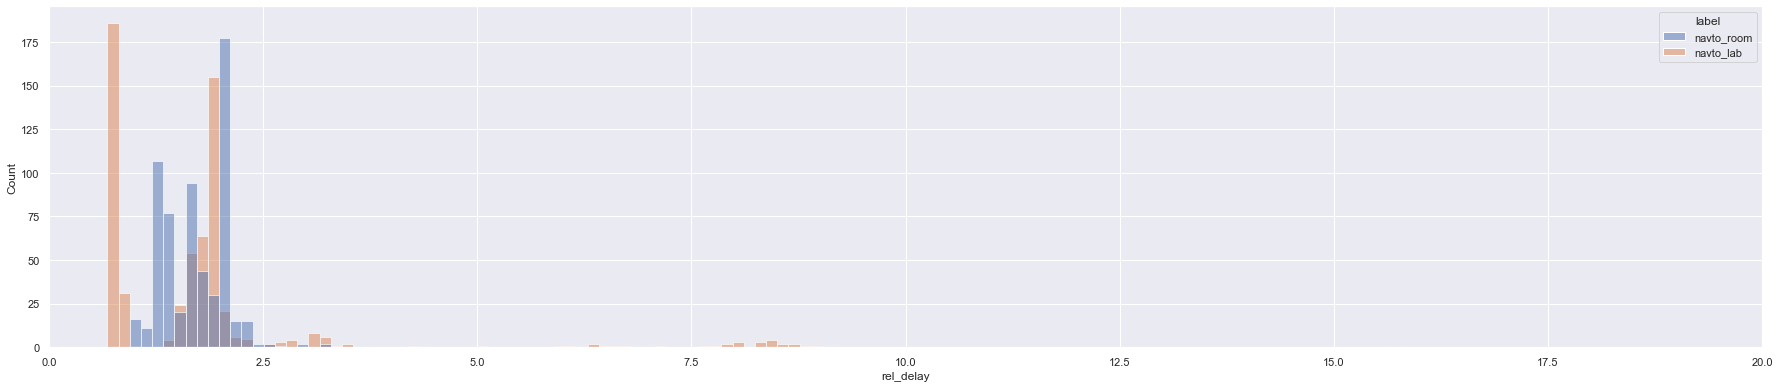

In [80]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
sns.histplot(data=planned_df[planned_df.skill=='navigation'], x="rel_delay", hue="label")


# Put the legend out of the figure
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

(0.0, 20.0)

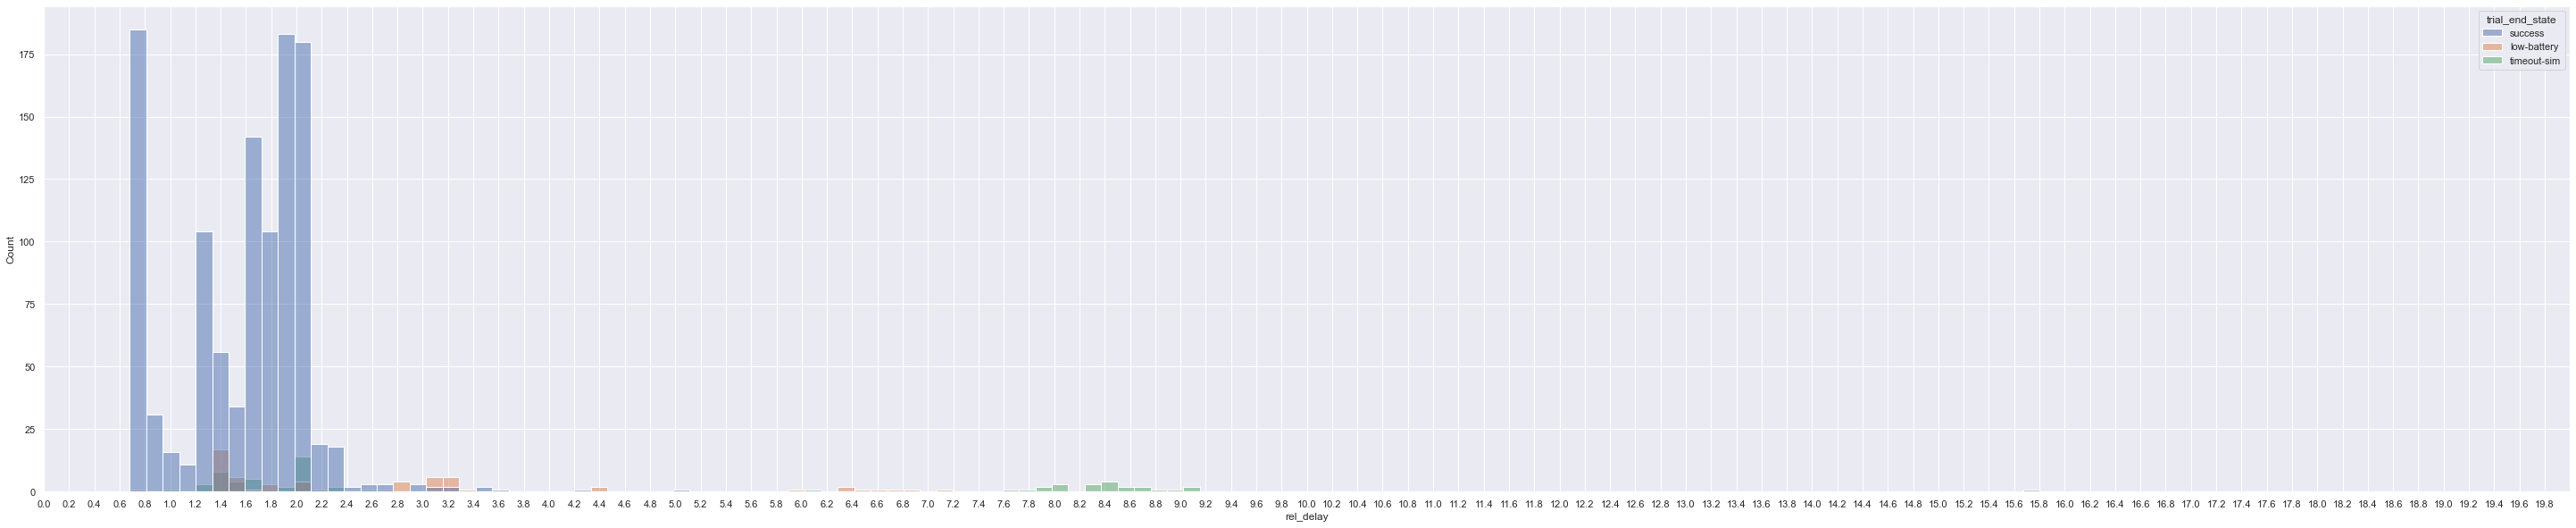

In [88]:
import numpy as np

sns.set(rc={'figure.figsize':(50.7,10)})
g = sns.histplot(data=planned_df[planned_df.skill=='navigation'], x="rel_delay", hue="trial_end_state")
g.set_xticks([i/10 for i in range(0, 200, 2)])
import matplotlib.pyplot as plt
plt.xlim(0, 20)
# Put the legend out of the figure
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='planned_time', ylabel='abs_delay'>

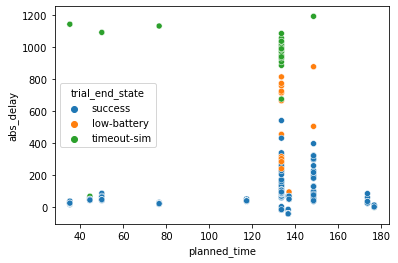

In [13]:
sns.scatterplot(data=planned_df[planned_df.skill=='navigation'], x="planned_time", y="abs_delay", hue="trial_end_state")

<AxesSubplot:xlabel='planned_time', ylabel='rel_delay'>

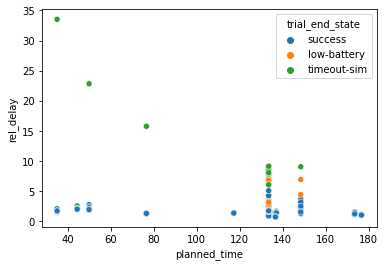

In [50]:
sns.scatterplot(data=planned_df[planned_df.skill=='navigation'], x="planned_time", y="rel_delay", hue="trial_end_state")

<AxesSubplot:xlabel='label', ylabel='abs_delay'>

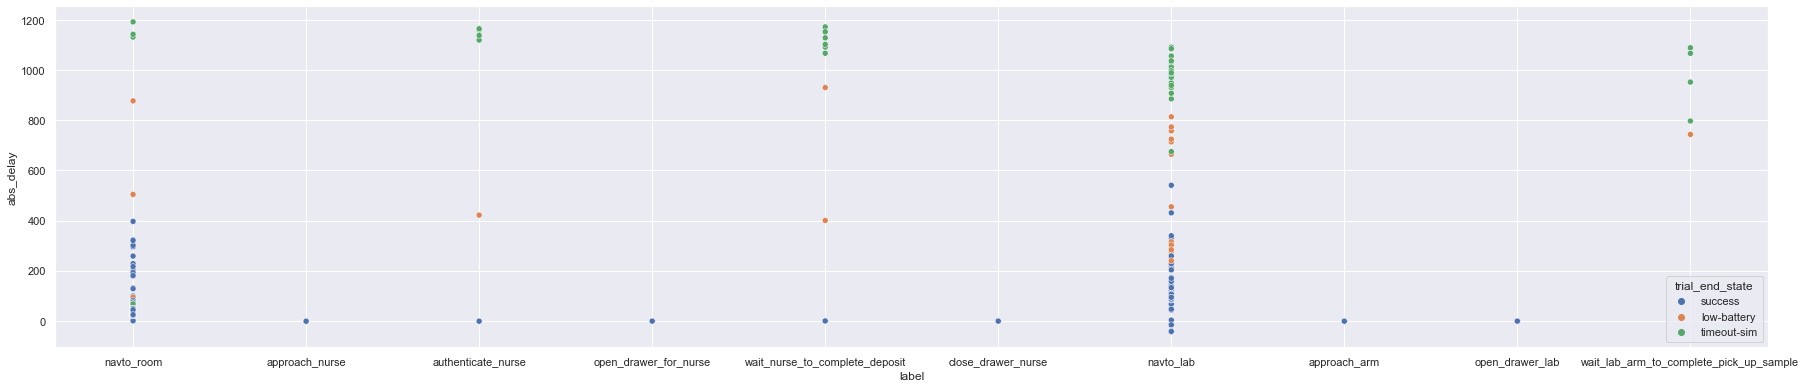

In [63]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
sns.scatterplot(data=planned_df[planned_df.skill!='send_message'], x="label", y="abs_delay", hue="trial_end_state")

<AxesSubplot:xlabel='label', ylabel='rel_delay'>

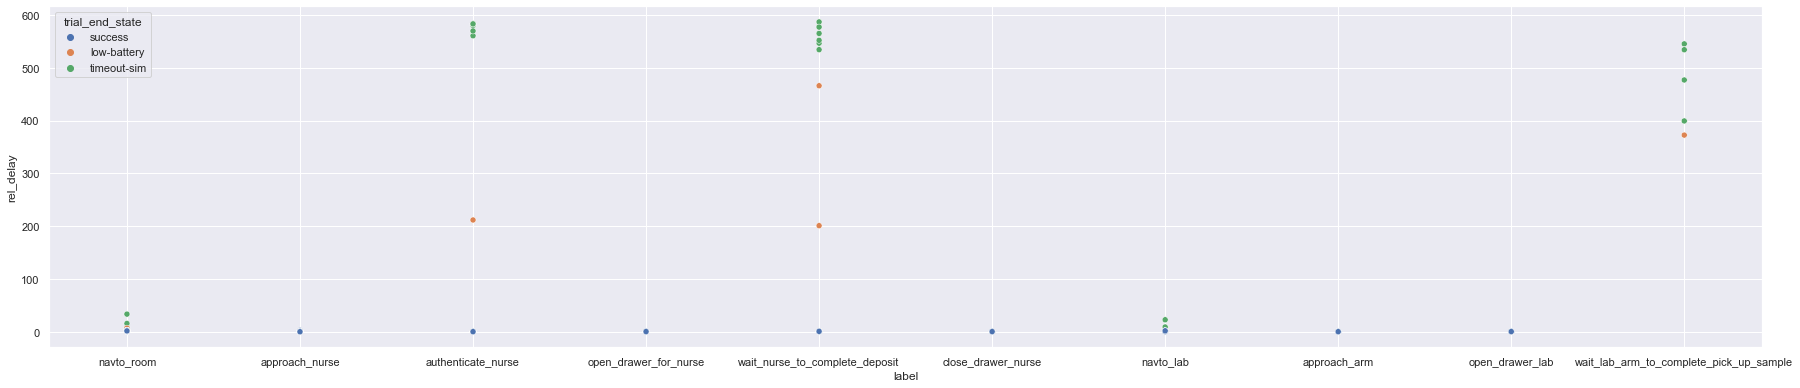

In [62]:
sns.set(rc={'figure.figsize':(30.7,6.27)})
sns.scatterplot(data=planned_df[planned_df.skill!='send_message'], x="label", y="rel_delay", hue="trial_end_state")

<AxesSubplot:xlabel='planned_time', ylabel='abs_delay'>

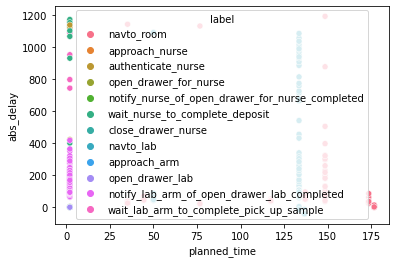

In [49]:
sns.scatterplot(data=planned_df[planned_df.end_state!='success'],
    x='planned_time', y='abs_delay', hue="label")


<AxesSubplot:xlabel='planned_time', ylabel='abs_delay'>

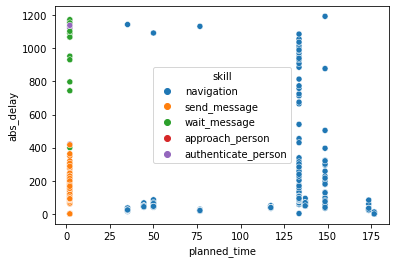

In [29]:
sns.scatterplot(data=planned_df[planned_df.abs_delay > 0], x="planned_time", y="abs_delay", hue="skill")

<AxesSubplot:xlabel='planned_time', ylabel='rel_delay'>

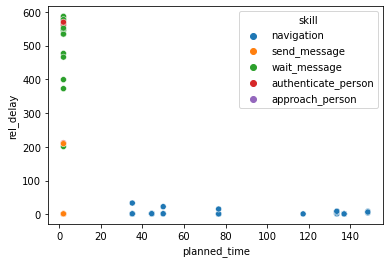

In [45]:
sns.scatterplot(data=planned_df[(planned_df.trial_end_state != 'success') & (planned_df.abs_delay > 0)], x="planned_time", y="rel_delay", hue="skill")

<AxesSubplot:xlabel='planned_time', ylabel='rel_delay'>

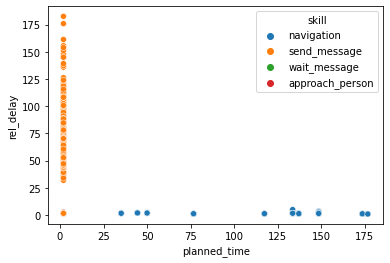

In [44]:
sns.scatterplot(data=planned_df[(planned_df.trial_end_state == 'success') & (planned_df.abs_delay > 0)], x="planned_time", y="rel_delay", hue="skill")

In [ ]:
import seaborn as sns

def exptent_time_relative(row):
    return row['expent_time'] / row['planned_time']
planned_nav['exptent_time_relative'] = planned_nav.apply(exptent_time_relative, axis=1)
#exptent_time_relative_df

sns.histplot(data=planned_nav, x="exptent_time_relative")